In [1]:
%%javascript
$.getScript('https://raw.githubusercontent.com/mlgill/ipython_notebook_goodies/gh-pages/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Challenge Set 3

| Title        | Answer                     |
| :---------- | :------------------------ |
| Topic:       | Linear Regression and Train/Test Split | 
| Date:        | 2016/07/17                 |
| Name:        | Michelle L. Gill           |
| Worked with: | None                       | 

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

%matplotlib inline

In [3]:
data = pd.read_csv('../../../challenges_data/2013_movies.csv').dropna()
data.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


In [4]:
data['ReleaseDate'] = pd.to_datetime(data.ReleaseDate)
data['ReleaseMonth'] = data.ReleaseDate.dt.month

## <a id='1'></a>Question 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [5]:
res1 = sm.ols('DomesticTotalGross ~ 1', data).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sun, 24 Jul 2016   Prob (F-statistic):                nan
Time:                        11:49:33   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.035e+08   9.43e+06     10.975      0.000      8.48e+07  1.22e+08
==============================================================================
Omnibus:                       47.828   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.528
Skew:                           2.032   Prob(JB):                     1.11e-26
Kurtosis:                       7.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

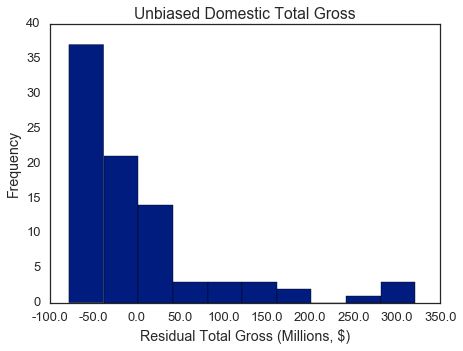

In [6]:
colors = sns.color_palette()

ax = res1.resid.hist(color=colors[0], figsize=(7,5))
ax.grid('off')

def scale_ticklabels(x, p):
    return "%.1f" % (x / (10 ** scale_pow))

scale_pow = 6
ax.get_xaxis().set_major_formatter(FuncFormatter(scale_ticklabels))

ax.set_xlabel('Residual Total Gross (Millions, $)')
ax.set_ylabel('Frequency')
ax.set_title('Unbiased Domestic Total Gross')

### Answer

In [7]:
print(data.DomesticTotalGross.mean()/1e6, res1.params[0]/1e6)

(103.51527564367815, 103.51527564367814)


In the presence of only a single, constant variable, the model returns the bias (mean) of the dependent data. The residuals will be simply the data values themselves with an offset (the mean) subtracted.

## <a id='2'></a>Question 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [14]:
res2 = sm.ols('DomesticTotalGross ~ Budget', data).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Sun, 24 Jul 2016   Prob (F-statistic):           1.19e-07
Time:                        11:54:57   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.443e+07    1.3e+07      3.418      0.001      1.86e+07  7.03e+07
Budget         0.7831      0.135      5.782      0.000         0.514     1.052
==============================================================================
Omnibus:                       38.475   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.671
Skew:                           1.577   Prob(JB):                     7.53e-21
Kurtosis:                       6.952   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

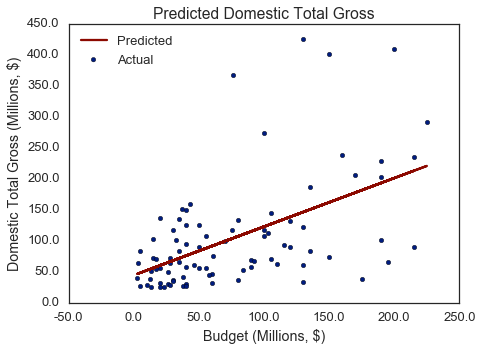

In [15]:
ax = data.plot('Budget','DomesticTotalGross',
              kind='scatter', label='Actual', color=colors[0], figsize=(7,5))
ax.plot(data.Budget, res2.predict(), label='Predicted', color=colors[2])

ax.legend(loc=2)
 
scale_pow = 6
ax.get_xaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))

ax.set_xlabel('Budget (Millions, $)')
ax.set_ylabel('Domestic Total Gross (Millions, $)')
ax.set_title('Predicted Domestic Total Gross')

### Answer

The model can be interpreted by plotting a best fit line (as was done here) or by plotting the residuals. Alternatively, a correlation plot of fit vs predicted Domestic Total Gross could have also been made.

## <a id='3'></a>Question 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [17]:
res3 = sm.ols('DomesticTotalGross ~ 1 + Rating', data).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.242
Date:                Sun, 24 Jul 2016   Prob (F-statistic):             0.0440
Time:                        11:55:24   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3428.
Df Residuals:                      84   BIC:                             3436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.319e+08   2.29e+07      5.756      0.000      8.64e+07  1.78e+08
Rating[T.PG-13] -1.422e+07   2.66e+07     -0.534      0.595     -6.72e+07  3.87e+07
Rating[T.R]     -5.772e+07   2.74e+07     -2.110      0.038     -1.12e+08 -3.32e+06
==============================================================================
Omnibus:                       39.974   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.928
Skew:                           1.759   Prob(JB):                     5.96e-19
Kurtosis:                       6.283   Cond. No.                         5.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

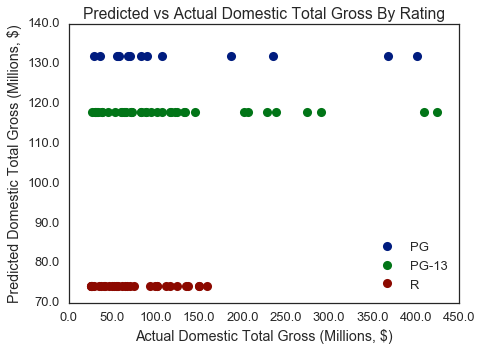

In [11]:
f = plt.figure()
f.set_size_inches(7,5)
ax = plt.axes()

for rating in ['PG', 'PG-13', 'R']:
    mask = data.Rating==rating
    actual = data.DomesticTotalGross.loc[mask]
    predict = res3.predict()[mask.values]
    ax.plot(actual, predict,
            marker='o', ls='', label=rating)

ax.legend(loc=0)
 
scale_pow = 6
ax.get_xaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))

ax.set_xlabel('Actual Domestic Total Gross (Millions, $)')
ax.set_ylabel('Predicted Domestic Total Gross (Millions, $)')
ax.set_title('Predicted vs Actual Domestic Total Gross By Rating')

### Answer

As this model only has a category, the results are similar to the results of question 1, except that the mean for each category (rating) is predicted. This can be seen by comparing the plot to the table below it.

In [12]:
data[['Rating','DomesticTotalGross']].groupby('Rating').mean()/1e6

,DomesticTotalGross
Rating,
PG,131.945869
PG-13,117.726612
R,74.227948


In [13]:
res3.params[0]/1e6, (res3.params[1]+res3.params[0])/1e6, (res3.params[2]+res3.params[0])/1e6

(131.94586957142863, 117.72661242499987, 74.22794878787866)

## <a id='4'></a>Question 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

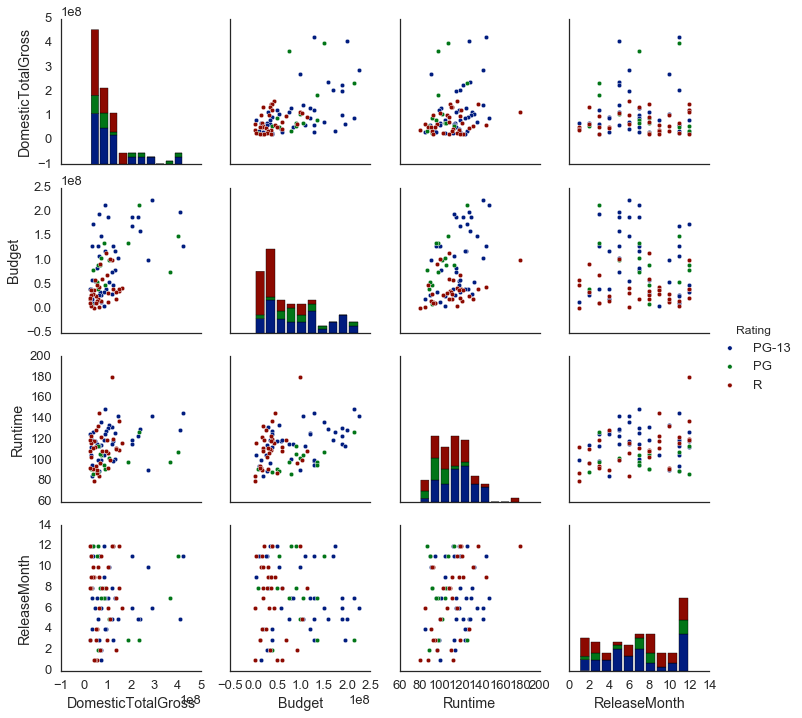

In [14]:
# Decide which features to use based on the correlation plots
sns.pairplot(data[['DomesticTotalGross','Budget','Runtime','ReleaseMonth','Rating']],
            hue='Rating')

In [15]:
res4 = sm.ols('np.log(DomesticTotalGross) ~ 1 + np.log(Budget) + Runtime + Rating', data).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(DomesticTotalGross)   R-squared:                       0.277
Model:                                    OLS   Adj. R-squared:                  0.242
Method:                         Least Squares   F-statistic:                     7.867
Date:                        Sun, 24 Jul 2016   Prob (F-statistic):           2.04e-05
Time:                                09:59:33   Log-Likelihood:                -79.718
No. Observations:                          87   AIC:                             169.4
Df Residuals:                              82   BIC:                             181.8
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          12.1807      1.426      8.542      0.000         9.344    15.017
Rating[T.PG-13]    -0.1440      0.210     -0.687      0.494        -0.561     0.273
Rating[T.R]        -0.1744      0.233     -0.749      0.456        -0.637     0.289
np.log(Budget)      0.3055      0.086      3.545      0.001         0.134     0.477
Runtime             0.0063      0.004      1.408      0.163        -0.003     0.015
==============================================================================
Omnibus:                        4.150   Durbin-Watson:                   0.706
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                2.406
Skew:                           0.170   Prob(JB):                        0.300
Kurtosis:                       2.260   Cond. No.                     2.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Answer

This is a considerably more complicated model with log-transformed data and categorical. Based on the P-values, I'd say budget is the primary important predictor of Domestic Total Gross.

## <a id='5'></a>Question 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [16]:
train, test = train_test_split(data, test_size=0.25, random_state=4444)

In [17]:
res5 = sm.ols('np.log(DomesticTotalGross) ~ 1 + np.log(Budget) + Runtime + Rating', train).fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(DomesticTotalGross)   R-squared:                       0.227
Model:                                    OLS   Adj. R-squared:                  0.175
Method:                         Least Squares   F-statistic:                     4.394
Date:                        Sun, 24 Jul 2016   Prob (F-statistic):            0.00350
Time:                                09:59:34   Log-Likelihood:                -63.052
No. Observations:                          65   AIC:                             136.1
Df Residuals:                              60   BIC:                             147.0
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          12.6859      1.773      7.155      0.000         9.139    16.232
Rating[T.PG-13]    -0.1602      0.256     -0.626      0.533        -0.672     0.352
Rating[T.R]        -0.1760      0.278     -0.633      0.529        -0.733     0.381
np.log(Budget)      0.2753      0.107      2.571      0.013         0.061     0.489
Runtime             0.0071      0.006      1.216      0.229        -0.005     0.019
==============================================================================
Omnibus:                        3.589   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                1.865
Skew:                           0.070   Prob(JB):                        0.394
Kurtosis:                       2.182   Cond. No.                     2.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
predict = np.exp(res5.predict(test))

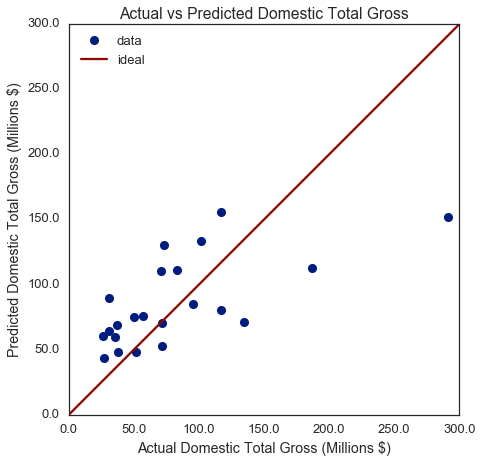

In [19]:
f = plt.figure()
f.set_size_inches(7,7)
ax = plt.axes()

ax.plot(test.DomesticTotalGross, predict, marker='o', ls='', label='data')
ax.plot([0,3e8],[0,3e8], color=colors[2], label='ideal', marker='', ls='-')
ax.set_xlim(0,3e8)
ax.set_ylim(ax.get_xlim())

ax.legend(loc=0)

scale_pow = 6
ax.get_xaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))

_ = ax.set(xlabel='Actual Domestic Total Gross (Millions $)', 
           ylabel='Predicted Domestic Total Gross (Millions $)',
           title='Actual vs Predicted Domestic Total Gross')